In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import linalg
from matplotlib import animation, rc 
rc('animation', html='html5') 
from IPython.display import HTML

warnings.filterwarnings("ignore")

# Problema Computacional - Física 2 - Cátedra: Depine. UBA.

Integrantes: María Sol Tur y Camila Gallo García.

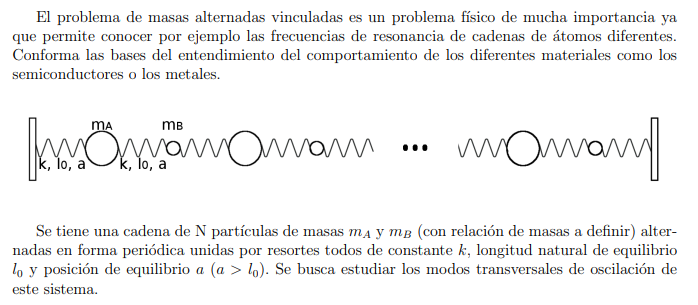

Para obtener las ecuaciones de Newton para N masitas de este sistema, primeramente analizamos la masa del extremo izquierdo quitándola del equilibrio y luego generalizamos las ecuaciones valiéndonos de la periodicidad en el que las masas aparecen.

Al ser un movimiento transversal, la masa solo se moverá verticalmente. Entonces, vamos a buscar las proyecciones de las fuerzas elásticas que sufre cada masita en el eje $\hat{y}$. Para resolver el ejercicio, vamos a considerar un sistema de coordenadas ubicándonos en el punto de equilibrio de cada masita.

Si corremos a la masa 1 del equilibrio, como se observa en la figura 1, vemos que actúan dos fuerzas elásticas sobre ella: una en su extremo izquierdo y la otra en el derecho. Para hallar sus componentes en el eje $\hat{y}$ vamos a aplicar trigonometría.

Por un lado, sabemos que el estiramiento del resorte 1 se escribe como:
$\sqrt{\psi_1^{2} + a^{2} } - lo$. Por otro lado, el del resorte 2 queda expresado como: $\sqrt{(\psi_2-\psi_1)^{2} + a^{2} } - lo$.

Para buscar sus componentes en el eje vertical, sabemos que $\Large cos(\theta_1 )=\frac{\psi_1}{\sqrt{\psi_1^{2}+a^2}}$ y $\Large cos(\theta_2 )=\frac{\psi_2-\psi_1}{\sqrt{(\psi_2-\psi_1)^{2}+a^2}}$

Entonces, la expresión de la ecuación de movimiento para la masa 1 nos queda:

$ m_1\ddot{\psi_1} = -k(\sqrt{\psi_1^{2} + a^{2} } - lo)\frac{\psi_1}{\sqrt{\psi_1^{2}+a^2}}+ k(\sqrt{(\psi_2-\psi_1)^{2} + a^{2} } - lo)\frac{(\psi_2-\psi_1)}{\sqrt{(\psi_2-\psi_1)^{2}+a^2}}$ y reordenando:
$m_1\ddot{\psi_1} = -k(1 - \frac{lo}{\sqrt{\psi_1^{2}+a^2}})\psi_1+ k(1 - \frac{lo}{\sqrt{(\psi_2-\psi_1)^{2}+a^2}})(\psi_2-\psi_1)(1)$

Como no es una ecuación diferencial lineal, hacemos un desarrollo de Taylor a primer orden. Si sacamos factor común "a" en el denominador obtenemos: 
$\large \frac{\psi_1}{a\sqrt{\frac{\psi_1^2}{a^2}+1}}(2)$ y $\large  \frac{\psi_2 - \psi_1}{a\sqrt{\frac{(\psi_2 - \psi_1)^{2}}{a}+1}}(3)$.

Y ahora, tomando $\varepsilon_1=\frac{\psi_1^2}{a^2}$ para la expresión (2) hacemos dicha aproximación  para oscilaciones pequeñas a la función $f$ = $\frac{1}{\sqrt{\varepsilon+1}}$. Luego llegamos a la siguiente expresión:

$f = f(0) + f'(0)\psi= 1 +....+$  donde tomamos solamente el primer término.

Repetimos lo mismo con la expresión (3) y la ecuación diferencial resulta:
$m_1\ddot{\psi_1} = -\tilde{k}\psi_1 + \tilde{k}(\psi_2 - \psi_1)$, con $\tilde{k} \equiv k(1-\frac{lo}{a})$.

De manera análoga para la segunda masa, se llega a la siguiente ecuación de movimiento:
$m_2\ddot{\psi_2} = \tilde{k}(\psi_3 - \psi_2) - \tilde{k}(\psi_2 - \psi_1)$, con $\tilde{k} \equiv k(1-\frac{lo}{a})$.

Entonces, generalizando, tenemos que las ecuaciones diferenciales que describen el movimiento del sistema resultan de este estilo:

$ m_n\ddot{\psi_n} = -2\tilde{k}\psi _n +\tilde{k}\psi_{n+1} +\tilde{k}\psi_{n-1} $ siendo n el número de cada masita. Si n es impar entonces corresponde a una masa a, de lo contrario a una masa b. Ya que el estamos asignando el número 1 a la primera masa y se sabe que están alternadas.

La última masa es una de tipo b y su ecuación de movimiento resulta igual que la primera.


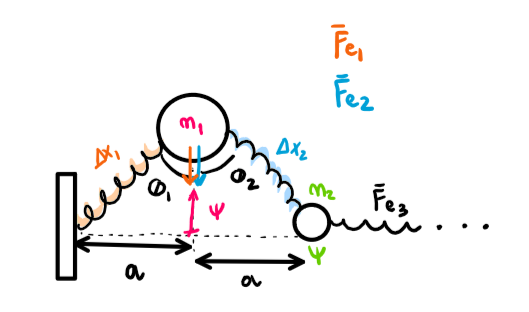

Figura 1: Diagrama de cuerpo libre masa 1.

          


LLevamos la notación a un sistema matricial y tenemos:
$\ddot{\vec{\psi}} = -\bar{M}\vec{\psi}$, $\; \ddot{\vec{\psi}}$ el vector aceleración, $\vec{\psi}$ el vector posición y M tal que

$M = \begin{pmatrix}
 2\frac{\tilde{k}}{m_a} &-\frac{\tilde{k}}{m_a} & 0  &\cdots  &\cdots    &0 &0\\
 \frac{-\tilde{k}}{m_b} &2\frac{\tilde{k}}{m_b}  &-\frac{\tilde{k}}{m_b}  &0 &\cdots &\cdots &0 \\ 
 0  &\frac{-\tilde{k}}{m_a} &2\frac{\tilde{k}}{m_a}  &\frac{-\tilde{k}}{m_a}  &0 &\cdots &0 \\ 
 \vdots   &0  &\ddots  &\ddots  &\ddots &&\vdots \\ 
 \vdots   &\vdots   &  &  &&&\vdots\\ 
 0 &\vdots  &  &  &  &&\vdots  \\ 
 0  &0  &\cdots  &\cdots   &0  &\frac{-\tilde{k}}{m_b} &2\frac{\tilde{k}}{m_b}
\end{pmatrix}$


Podemos resolver este sistema hallando los autovalores y autovectores de la matriz M, de esta manera podemos desacoplar las ecuaciones de movimiento y proponer $\psi_p = A_pcos(\omega_p t + \phi_p )$ como solución para un modo de oscilación en particular. Siendo un modo normal una forma particular que tiene de oscilar el sistema en el que todas las masas tienen la misma frecuencia y pasan por la posición de equilibrio al mismo tiempo. Permitiéndonos expresar a la ecuación de movimiento como una combinación lineal de los modos normales del sistema. Siendo los autovalores hallados las frecuencias de los modos al cuadrado y cada coordenada de los autovectores indicará cuánto afectará cada modo a cada masita.

In [ ]:
#declaramos nuestras variables
cant_de_masas = 10 
a = 0.20 #m
t = np.linspace(0,np.pi*6,1000) #s
g = 9.8 #m/s**2
k = 0.8 #kg/s**2
L0 = 0.05 #m
k_moño = k*(1-L0/a) #kg/s**2

#Dejamos el código acá al inicio del trabajo así ya lo utilizamos directamente durante el resto del Colab.

In [ ]:
#@title Ecuaciones de Newton matricial
def ecuaciones_de_newton_matricial(n_masas, ma, mb):
  #Hay que tener cuidado con las n_masas, hay veces en las que no debería terminar con una masa mb 
  #y el código está hecho de una forma en la que no se percata de esas situaciones. Para n = 10 y n = 250 las ecuaciones son correctas de todas formas.
  
  matriz_m = np.repeat(0.0, n_masas*n_masas).reshape(n_masas, n_masas) #armamos nuestra matriz llena de 0

  for i in range(1, n_masas-1):
    if i % 2 == 0:
      matriz_m[(i, i)] = 2*k_moño/ma
      matriz_m[(i, i - 1)] = -1*k_moño/ma
      matriz_m[(i, i + 1)] = -1*k_moño/ma
    else:
      matriz_m[(i, i)] = 2*k_moño/mb
      matriz_m[(i, i - 1)] = -1*k_moño/mb
      matriz_m[(i, i + 1)] = -1*k_moño/mb

  #Ahora arreglamos manualmente los bordes
  matriz_m[(0,0)] = 2*k_moño/ma
  matriz_m[(0,1)] = -1*k_moño/ma  

  matriz_m[(n_masas-1,n_masas-1)] = 2*k_moño/mb
  matriz_m[(n_masas-1,n_masas-2)] = -1*k_moño/mb   
  return matriz_m

In [ ]:
#@title Modos normales
def modos_normales(matriz):
  autovalores, autovectores = scipy.linalg.eig(matriz)
  #Como numpy no te entrega los autovalores ordenados, los ordenamos(valga la redundancia) de menor a mayor
  indice = autovalores.argsort()[::] 
  frecuencias = np.sqrt(autovalores[indice])
  modos = autovectores[:, indice]

  return frecuencias, modos

In [ ]:
#@title Ecuación general 
def sumatoria(n, frecuencias, amplitud_autovector):
    """Esta función lo que hace es calcularte todas las posiciones de las masas para cada modo en particular. 
    Es decir, cada modo particular está guardado en una lista separada y eso a su vez está guardado en un diccionario donde cada clave es el número de la masa"""

    ecuaciones = {}
    phi = 0 #Simplificamos las ecuaciones usando una fase inicial 0
    c = 1 #Lo voy a usar para contar
    
    for autovector in amplitud_autovector: #esto toma las filas de la matriz de autovectores que nos devolvió scipy antes
        caja_de_sumas = [] #acá vamos a guardar una lista de soluciones para el modo 1, otra para el 2 y así hasta N.  
        for j in range(len(amplitud_autovector)): #esto se mueve entre las columnas de la MISMA fila, es decir, va armando las ecuaciones en orden. 1ero para la masa 1, después pasa a la 2 y sigue hasta N
            caja_de_sumas.append([autovector[j]*np.cos(frecuencias[j]*t + phi)])
        ecuaciones[c] = caja_de_sumas #Finalmente, todas esas listas que estuvo armando, las guarda en un diccionario con el número de masita como clave
        c +=1
        
    return ecuaciones 

In [ ]:
#@title Graficadora de modos
def graficadora_de_modos(n_modo, ecuaciones):
    """Esta funcion grafica sólo el modo que le pido.
    observación: el n_modo tiene que coincidir con la posición del numero de frecuencia correspondiente. Es decir, si quiero el 1er modo, tengo que decirle a python
    que se fije solo en la primer lista de cada item en el diccionario"""
    plt.figure(figsize=(7,5))
    plt.title("Modo " + str(n_modo), fontsize =20)
    plt.xlabel("t(s)",fontsize = 16)
    plt.ylabel("x(t)", fontsize = 16)
    plt.grid()
    modo = n_modo - 1 #Acá transformamos nuestra forma de contar(1,2,3...) a la forma de python (0,1,2...)
    for i in range(1, cant_de_masas+1): #esto va a agarrar las keys del diccionario
        if i % 2 == 0:       
            plt.plot(t, ecuaciones[i][modo][0],"--", label = "masa " + str(i), lw=2, zorder=2)
        else:
            plt.plot(t, ecuaciones[i][modo][0], label = "masa " + str(i), lw=2, zorder=1)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        

In [ ]:
#@title Graficadora que utiliza el formalismo periódico
def graficadora_formalismo(n_modo, n_masas):
    plt.figure(figsize=(7,5))
    plt.title("Modo " + str(n_modo), fontsize =20)
    plt.xlabel("t(s)",fontsize = 16)
    plt.ylabel("x(t)", fontsize = 16)
    plt.grid()
    m = 1 #caso masas iguales
    k_modal = n_modo*np.pi/((n_masas + 1)*a)
    w_modal = 2*np.sqrt(k_moño/m)*abs(np.sin((k_modal*a)/2))

    for masa in range(1, n_masas + 1):
      psi = np.cos(k_modal*masa*a - np.pi/2)*np.cos(w_modal*t)
      if masa % 2 == 0:
        plt.plot(t, psi,"--", label = "masa " + str(masa), lw=2, zorder=2)
      else:
        plt.plot(t, psi, label = "masa " + str(masa), lw=2, zorder=1)
        
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
#@title Calculadora de condiciones iniciales

def calculadora_de_c_i(n_masas, matriz_de_autovectores, ecuaciones, Ampl_iniciales):

    D = matriz_de_autovectores
    inversa_de_D = np.linalg.inv(D)

    C_i = []
    psies = []
    
    plt.figure(figsize=(8,6))
    plt.title("Posiciones en funcion del tiempo", fontsize = 20)
    plt.xlabel("t(s)",fontsize = 16)
    plt.ylabel(r"$\Psi(t)$", fontsize = 16)
    plt.grid()
    
    for i in range(n_masas):
        cuenta = inversa_de_D[i,0]*Ampl_iniciales[0]+ \
        inversa_de_D[i,1]*Ampl_iniciales[1]+ \
        inversa_de_D[i,2]*Ampl_iniciales[2]+ \
        inversa_de_D[i,3]*Ampl_iniciales[3]+ \
        inversa_de_D[i,4]*Ampl_iniciales[4]+ \
        inversa_de_D[i,4]*Ampl_iniciales[4]+ \
        inversa_de_D[i,6]*Ampl_iniciales[6]+ \
        inversa_de_D[i,7]*Ampl_iniciales[7]+ \
        inversa_de_D[i,8]*Ampl_iniciales[8]+ \
        inversa_de_D[i,9]*Ampl_iniciales[9]
        
        C_i.append(cuenta)
        

    for i in range(1, n_masas + 1):
        psi = C_i[0]*ecuaciones[i][0][0] + \
              C_i[1]*ecuaciones[i][1][0] + \
              C_i[2]*ecuaciones[i][2][0] + \
              C_i[3]*ecuaciones[i][3][0] + \
              C_i[4]*ecuaciones[i][4][0] + \
              C_i[5]*ecuaciones[i][5][0] + \
              C_i[6]*ecuaciones[i][6][0] + \
              C_i[7]*ecuaciones[i][7][0] + \
              C_i[8]*ecuaciones[i][8][0] + \
              C_i[9]*ecuaciones[i][9][0]

        
        psies.append([psi])  
        if i % 2 == 0:       
            plt.plot(t,psi,"--", label = "masa " +str(i), lw=2) 
        else:
            plt.plot(t,psi,"-", label = "masa " +str(i), lw=2)
        
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

    return psies


# Caso todas las masas iguales: Formalismo periódico vs método matricial.

Para esta parte del trabajo queremos comparar el método matricial y el formalismo de N-masas y ver que se llegan a los mismos resultados. Vamos a trabajar considerando que $m_a = m_b$. 

Recordamos que nuestras ecuaciones de movimiento quedaron de esta forma:
$ m\ddot{\psi_n} = -2\tilde{k}\psi _n +\tilde{k}\psi_{n+1} +\tilde{k}\psi_{n-1} (1)$

Para resolver el sistema con el formalismo de N- masas proponemos una solución de este estilo: $\psi_p = A_n^{p}cos(w_pt + \phi_p)$. Derivando y reemplazando en la Ec.(1) tenemos:

$ -m\omega_{p}^{2}A_n^{p}cos(\omega_p t + \phi_p) = -2\tilde{k}A_n^{p}cos(\omega_p t + \phi_p) + \tilde{k}A_{n+1}^{p}cos(w_pt + \phi_p) + \tilde{k}A_{n-1}^{p}cos(w_pt + \phi_p) $ pero queremos que valga para todo tiempo t, entonces podemos cancelar los cosenos. Así obtenemos:

$ -m\omega_p^{2}A_n^{p} = -2\tilde{k}A_n^{p} + \tilde{k}A_{n+1}^{p} + \tilde{k}A_{n-1}^{p} $ 

y reordenando llegamos a:

$ (2 -\frac{m}{\tilde{k}}\omega_p^{2})A_n^{p} = A_{n+1}^{p} + A_{n-1}^{p}$(2)

Siendo la Ec.(2) la ecuación recursiva de amplitudes, por lo que ahora propondremos como solución 

$A_n^{p}  =  Acos(k_{p}na + \alpha_{p})$

Reemplazamos en (2) obtenemos:

$(2 -\frac{m}{\tilde{k}}\omega_{p}^{2}) Acos(k_{p}na + \alpha_{p}) = \tilde{k}Acos(k_{p}(n+1)a + \alpha_{p}) + \tilde{k}Acos(k_{p}(n-1)a + \alpha_{p}) (3) $

Podemos cancelar las A que multiplican porque si fueran 0 no habría movimiento y reescribimos los cosenos usando la propiedad:

$cos(\alpha \pm \beta) = cos(\alpha)cos(\beta) \mp sen(\alpha)cos(\beta) $

Tenemos entonces que:

$cos(k_{p}(n+1)a + \alpha_{p}) = cos(k_{n}na + \alpha_{p} + k_{p}a)$

$cos(k_{p}(n-1)a + \alpha_{p}) = cos(k_{p}na + \alpha_{p} - k_{p}a)$

Si llamamos $\alpha = k_{p}na + \alpha_{p}$ y $\beta = k_{p}a$ y aplicamos la propiedad en la Eq (3):

$cos(k_{p}(n+1)a + \alpha_{p}) = cos(k_{p}na + \alpha_{p})cos(k_{p}a) - sen(k_{p}na + \alpha_{p})sen(k_{p}a)$ (4)

$cos(k_{p}(n-1)a + \alpha_{p}) = cos(k_{p}na + \alpha_{p})cos(k_{p}a) + sen(k_{p}na + \alpha_{p})sen(k_{p}a)$ (5)

Reemplazando (3) y (4) en las expresiones del segundo miembro de la Ec.(3) llegamos a:

$(2 -\frac{m}{\tilde{k}}\omega_{p}^{2})cos(k_{p}na + \alpha_{p}) = 2\tilde{k}cos(k_{p}na + \alpha_{p})cos(k_{p}a)$

$ (2 -\frac{m}{\tilde{k}}\omega_{p}^{2}) = 2 \tilde{k}cos(k_{p}a) $

$2 - 2 \tilde{k}cos(k_{p}a) = \frac{m}{\tilde{k}}\omega_{p}^{2}  $

$2 (1 - \tilde{k}cos(k_{p}a)) = \frac{m}{\tilde{k}}\omega_{p}^{2}  $

$ \omega_{p}^{2} = 2\frac{\tilde{k}}{m}(1 - \tilde{k}cos(k_{p}a)) $

Reemplazamos $1 - cos(k_{p}a) =  2sen^{2}(\frac{k_{p}a}{2})$ y conseguimos así la Ec. (6).

$ \Large \omega_{p}^{2} =  \frac{4\tilde{k}}{m}sen^{2}(\frac{k_{p}a}{2})$ (6)

Esta es la relación de dispersión que nos relaciona la frecuencia espacial $k_{p}$  con la temporal $\omega_{p}$ para N masas iguales equiespaciadas. $k_{p}$ es el número de onda y al estar en un sistema con extremos fijos, esta va a tomar la forma $k_{p} = p \frac{\pi}{a(N+1)} $, p es el número de modo. Para este sistema, como tenemos 10 masas con 1 grado de libertad, tenemos que p $\in$ [1, 2,..., 9, 10] y $\alpha = -\frac{\pi}{2}$. Con este formalismo, la solución para todo tiempo de una masa queda entonces como:

$\psi(na,t) = Acos(k_{p}na + \alpha_{p})cos(w_{p}t + \phi_{p})$ donde n indica el modo en el que estamos y na la posición de la masa que estamos mirando. Además sabemos que el término $cos(k_{p}na + \alpha)$ corresponde al autovector del caso matricial.



Ahora vamos a graficar los modos de oscilación con la solución matricial y el formalismo de N masas.

In [ ]:
caso_matricial = ecuaciones_de_newton_matricial(cant_de_masas,1,1) #Armamos la matriz M
modos_matricial = modos_normales(caso_matricial) #Calculamos las frecuencias normales
modo_frec_matricial = modos_matricial[0] #las frecuencias
modo_autovec_matricial = modos_matricial[1] #los autovectores del sistema

Visualizamos qué frecuencias obtuvimos y sus correspondientes autovectores:






In [ ]:
#print([i for i in modo_frec_matricial])

In [ ]:
#print([i for i in modo_autovec_matricial])

---
*   $\omega_1^{2} = 0.22$ $\: \bar{v_1} = (-0.12,  0.23, -0.32, -0.39,  0.42, -0.42,  0.39,  0.32 ,  0.23,  0.12)$

---

*   $\omega_2^{2} = 0.44$$\:\bar{v_2} = (-0.23,  0.39, -0.42, -0.32, 0.12, 0.12, -0.32, -0.42, -0.39, -0.23)$

---

*   $\omega_3^{2} = 0.64$ $\:\bar{v_3} = (-0.32,  0.42, -0.23,  0.12, -0.39, 0.39, -0.12,  0.23,  0.42,  0.32)$
---
*   $\omega_4^{2} = 0.84$ $\:\bar{v_4} = (-0.39,  0.32,  0.12,0.42, -0.23,-0.23,  0.42,  0.12, -0.32, -0.39)$
---
*   $\omega_5^{2} = 1.014$ $\:\bar{v_5} =  (-0.42,  0.12,  0.39,  0.23,  0.32,-0.32, -0.23, -0.39,  0.12,  0.42)$
---
*   $\omega_6^{2} = 1.17$$\:\bar{v_6} =  (-0.42, -0.12,  0.39, -0.23,  0.32, 0.32, -0.23,  0.39,  0.12, -0.42)$
---
*   $\omega_7^{2} = 1.30$ $\:\bar{v_7} =  (-0.39, -0.32,  0.12, -0.42, -0.23, 0.23,  0.42, -0.12, -0.32,  0.39)$
---
*   $\omega_8^{2} = 1.41$$\:\bar{v_8} =  (-0.32, -0.42, -0.23, -0.12, -0.39, -0.39, -0.12, -0.23,  0.42, -0.32)$
---
*   $\omega_9^{2} = 1.49$ $\:\bar{v_9} =  (-0.23, -0.39, -0.42,  0.32,  0.12,
-0.12, -0.32,  0.42, -0.39,  0.23)$ 
---
*   $\omega_{10}^{2} = 1.53$$\:\bar{v_{10}} = (-0.12, -0.23, -0.32,  0.39,  0.42, 0.42,  0.39, -0.32,  0.23, -0.12)$
---



In [ ]:
ecuaciones = sumatoria(cant_de_masas, modo_frec_matricial, modo_autovec_matricial) 

Armamos las ecuaciones para cada modo por separado y graficamos tanto para el método matricial como para el formalismo.

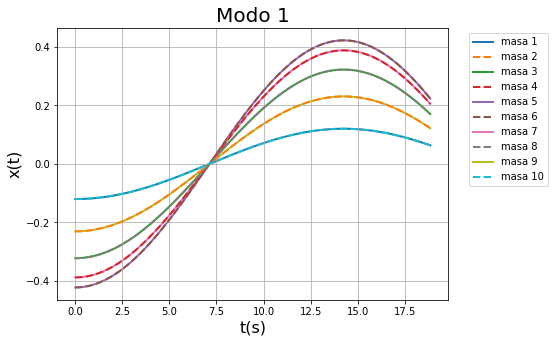

In [ ]:
graficadora_de_modos(1, ecuaciones)

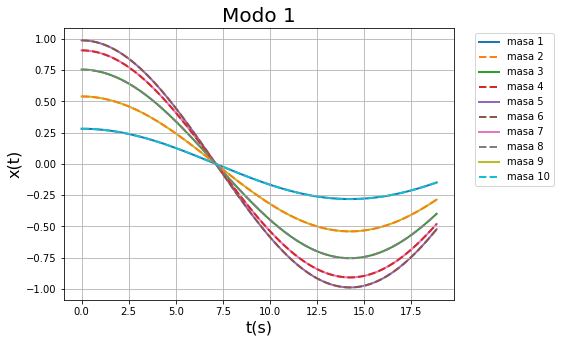

In [ ]:
graficadora_formalismo(1, cant_de_masas)

Comparando ambos gráficos podemos ver que ambos resultados son congruentes 
entre sí aunque difieren por un signo. Ese signo después es compensado por la amplitud. En ambos podemos 
apreciar el movimiento correspondiente al modo 1, en el que todas las masas se 
mueven en fase y cruzan el punto de equilibrio al mismo tiempo.

Tiene sentido porque las masas 1 y 10, que corresponden a los extremos, son las que presentan menor amplitud en su movimiento. En cambio, las masas que están en el centro, en este caso las masas 5 y 6 son las que más se apartan del equilibrio. 

Hay una diferencia en las escalas pero no es problema porque ambos autovectores son multiplos entre sí, por lo que generan el mismo subespacio.

Aclaración: la diferencia de signo se va a presentar en algunos de los siguientes gráficos también, pero la explicación es la misma que la dicha en esta celda.

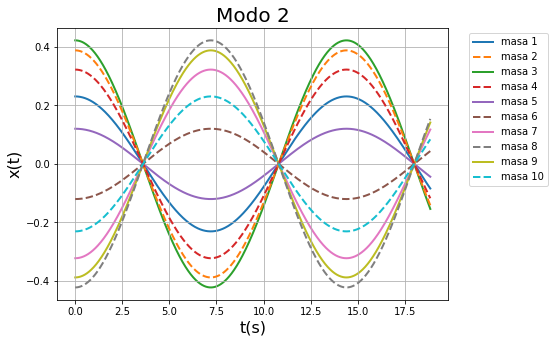

In [ ]:
graficadora_de_modos(2, ecuaciones)

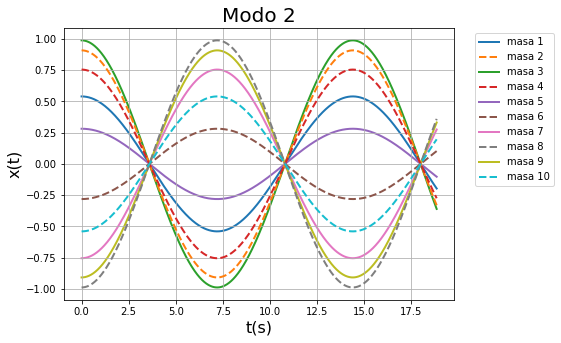

In [ ]:
graficadora_formalismo(2, cant_de_masas)


Vemos que las masas respetan la forma del modo 2. Siendo más específicas, se puede observar que cada masa tiene su opuesto correspondiente. Es decir, vemos que la masa 1 se mueve con la misma amplitud y signo opuesto que la masa 10. Lo mismo ocurre si nos vamos de los extremos hacia el centro. Además vemos que las masas 5 y 6 tienen la menor amplitud de movimiento.


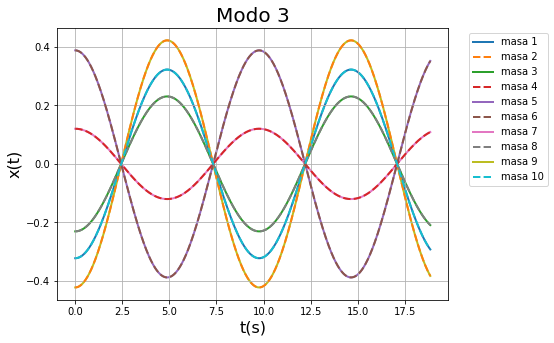

In [ ]:
graficadora_de_modos(3, ecuaciones)

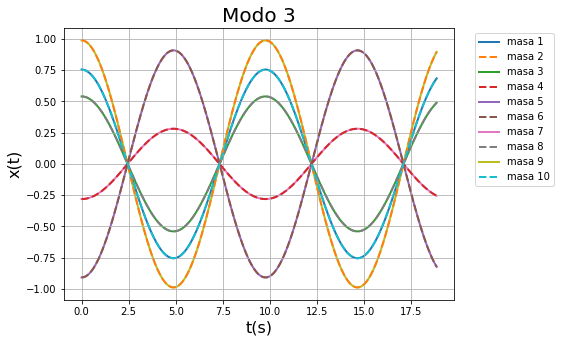

In [ ]:
graficadora_formalismo(3, cant_de_masas)

Vemos que se cumple otra vez la definición de modo normal. Las trayectorias de las masas 4 y 7 son las mismas, por eso están superpuestas, estas a su vez van en fase con las masas 6 y 5, solo que estas últimas tiene mayor amplitud.
Estas cuatro  mencionadas anteriormente están en contrafase con las masas 1, 2, 3, 8, 9 y 10.

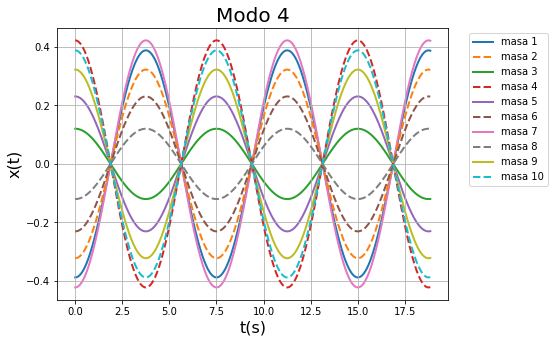

In [ ]:
graficadora_de_modos(4, ecuaciones)

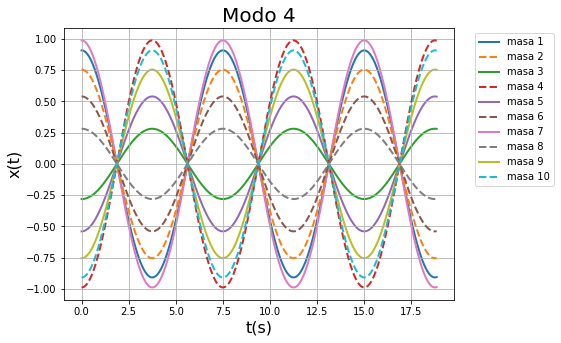

In [ ]:
graficadora_formalismo(4, cant_de_masas)

En este gráfico vemos que las masas 3, 4, 5, 9 y 10 se mueven en fase entre ellas y en contra fase con las masas 1, 2, 6, 7 y 8. Las que tienen menor amplitud son las masa 3 y 8 y las de mayor amplitud son las 4 y 7.

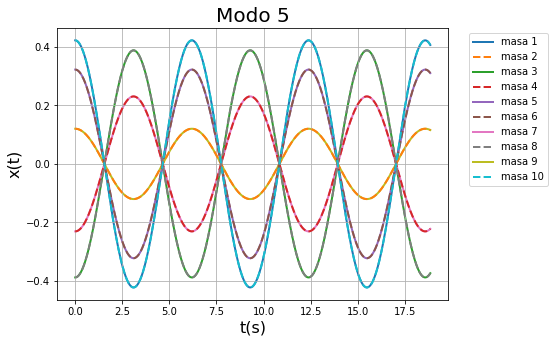

In [ ]:
graficadora_de_modos(5, ecuaciones)

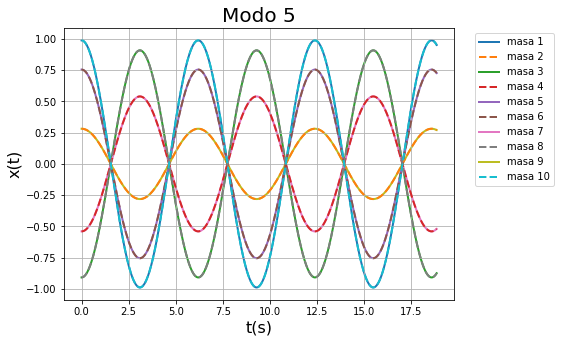

In [ ]:
graficadora_formalismo(5, cant_de_masas)

Finalmente, en el modo 5 vemos que las masas 2 y 9 son las de menor amplitud y se mueven en fase con las masas 1, 5, 6 y 10. Y estas a su vez en contrafase con las masas 3, 4, 7 y 8. De nuevo los gráficos difieren en un signo.

 Además, prestando atención al tiempo t en el que cruzan el punto de equilibrio cada gráfico, vemos que el mayor t corresponde al modo 1 y el menor al modo 5. Lo cual tiene sentido al recordar los valores de las frecuencias. A mayor frecuencia, menor es el período porque $ T = \frac{2\pi}{\omega}$.  

# Combinación lineal de modos
Si queremos excitar al modo 2 y al modo 4, basta con dar una combinación lineal de los vectores que conforman esas soluciones, ya que como mencionamos anteriormente, los distintos modos de oscilación de un sistema forman una base de soluciones.

Nosotras elegimos, por ejemplo, $\bar{v_2} + \bar{v_4}$ y velocidad inicial nula.

In [ ]:
v_2 = modo_autovec_matricial[1]
v_4 = modo_autovec_matricial[3]
x_inicial = v_2 + v_4
#print(x_inicial)

$\bar{x_i} = (-0.62, 0.71, -0.30, 0.10, -0.11, -0.11, 0.10, -0.30, -0.71, -0.62)$ y 
$\bar{v_i} = (0,0,0,0,0,0,0,0,0,0)$

Para convencernos de que efectivamente se activan esos modos, grafiquemos.

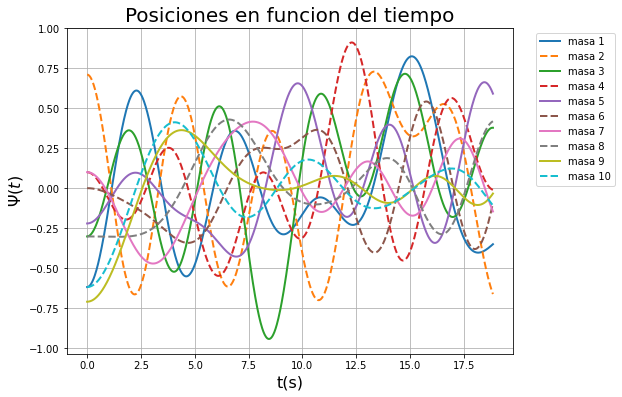

In [ ]:
posiciones_comb_lineal = calculadora_de_c_i(10, modo_autovec_matricial,ecuaciones, x_inicial)

Como puede resultar confuso leer el gráfico, decidimos animar el movimiento. 

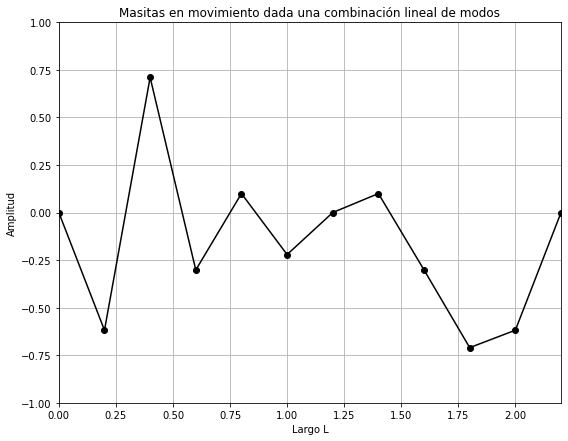

In [ ]:
#@title Código de las animaciones
psi1cl = posiciones_comb_lineal[0]
psi2cl = posiciones_comb_lineal[1]
psi3cl = posiciones_comb_lineal[2]
psi4cl = posiciones_comb_lineal[3]
psi5cl = posiciones_comb_lineal[4]
psi6cl = posiciones_comb_lineal[5]
psi7cl = posiciones_comb_lineal[6]
psi8cl = posiciones_comb_lineal[7]
psi9cl = posiciones_comb_lineal[8]
psi10cl = posiciones_comb_lineal[9]

var1cl=psi1cl[0]
var2cl=psi2cl[0]
var3cl=psi3cl[0]
var4cl=psi4cl[0]
var5cl=psi5cl[0]
var6cl=psi6cl[0]
var7cl=psi7cl[0]
var8cl=psi8cl[0]
var9cl=psi9cl[0]
var10cl=psi10cl[0]

var0cl = [0]*len(var1cl) #las masas imaginarias fijas en los extremos

fig, ax = plt.subplots(figsize=(9,7));
line, = ax.plot([], [],'ok-');

ax.set_xlim(0,a*(cant_de_masas+1));
ax.set_ylim(-1,1);

plt.xlabel("Largo L");
plt.ylabel("Amplitud");
plt.title("Masitas en movimiento dada una combinación lineal de modos");
plt.grid();


def animate1(i):
    Y = [var0cl[i],var1cl[i], var2cl[i], var3cl[i],var4cl[i],var5cl[i],var6cl[i],var7cl[i],var8cl[i],var9cl[i],var10cl[i],var0cl[i]]
    X = [0,a,2*a, 3*a,4*a, 5*a, 6*a,7*a, 8*a, 9*a,10*a,11*a]
    line.set_data(X,Y)
    return (line)
  
anim = animation.FuncAnimation(fig, animate1, frames=len(t), interval=7);

anim

En la animación se puede apreciar que el movimiento de las masas imita al de la suma de los dos modos, que sería la suma de dos sinusoidales con distinta frecuencia como muestra la siguiente imagen, que después evoluciona con el tiempo.

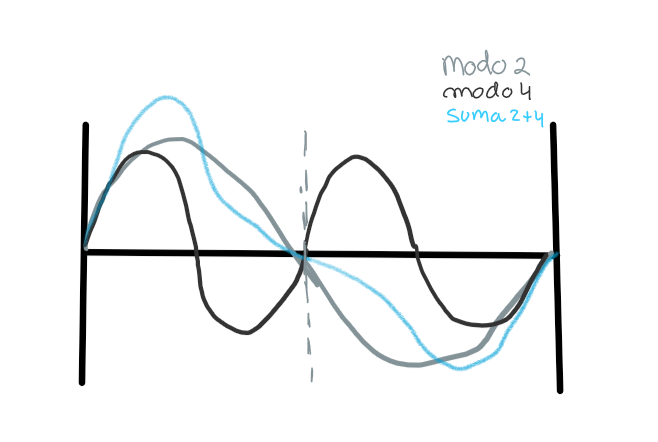

# Relaciones de dispersión 

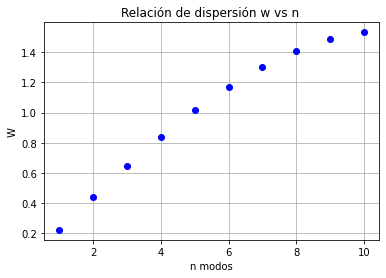

In [ ]:
#Ahora, para graficar la relación de dispersión utilizamos el formalismo de las N mesas.
m = 1
n = np.linspace(1, cant_de_masas, cant_de_masas)
k_modos = n*np.pi/(a*(cant_de_masas + 1))
w_dispersion = 2*np.sqrt(k_moño/m)*abs(np.sin((k_modos*a)/2))

plt.plot(n, w_dispersion, 'bo')
plt.ylabel("W")
plt.xlabel("n modos")
plt.title("Relación de dispersión w vs n ")
plt.grid()

Para ver que las frecuencias obtenidas con el formalismo de N masas periódicas coinciden con las del método matricial, las imprimimos en patalla. Por ejemplo, veamos el modo 8 y comparemos.

In [ ]:
frec_8_matricial = modo_frec_matricial[7]
frec_8_formalismo = w_dispersion[7]

print(round(frec_8_matricial,2))
print(round(frec_8_formalismo,2))

(1.41+0j)
1.41


Efectivamente, ambas frecuencias valen 1.41 $s^{-1}$


In [ ]:
#Se pueden ver las demás frecuencias pero lo dejamos en forma de comentario para que no se ejecute.

#frec_6_matricial = modo_frec_matricial[5]
#frec_6_formalismo = w_dispersion[5]

#print(round(frec_6_matricial,2))
#print(round(frec_6_formalismo,2))

#frec_3_matricial = modo_frec_matricial[2]
#frec_3_formalismo = w_dispersion[2]

#print(round(frec_3_matricial,2))
#print(round(frec_3_formalismo,2))

#frec_7_matricial = modo_frec_matricial[6]
#frec_7_formalismo = w_dispersion[6]

#print(round(frec_7_matricial,2))
#print(round(frec_7_formalismo,2))

Ahora analizamos el caso para n = 250

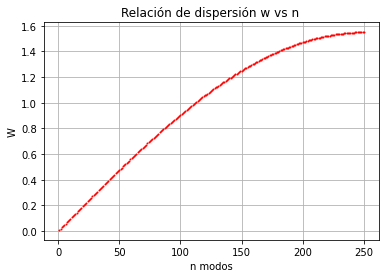

In [ ]:
n_250 = np.linspace(1, 250,250)
k_modos = n_250*np.pi/(a*(250 + 1))
w_dispersion_250 = 2*np.sqrt(k_moño/m)*abs(np.sin((k_modos*a)/2))

plt.plot(n_250, w_dispersion_250, "ro", markersize=1)
plt.title("Relación de dispersión w vs n ")
plt.ylabel("W")
plt.xlabel("n modos")
plt.grid()

In [ ]:
matriz_250 = ecuaciones_de_newton_matricial(250,1,1) 
frec_250 = modos_normales(matriz_250)[0] 

In [ ]:
frec_200_matricial = frec_250[199]
frec_formalismo = w_dispersion_250[199]

print(round(frec_200_matricial,2))
print(round(frec_formalismo,2))


(1.47+0j)
1.47


Se observa que coinciden las frecuencias de ambos métodos. En este caso, podemos apreciar que la variación entre modos en el eje $\hat{y}$ es más "suave". Es decir, en el caso de N = 10 hay "saltos abruptos" pero en este, pasa por valores intermedios hasta llegar a la misma frecuencia. 

# Caso cadena diatómica


Ahora, vamos a alterar las relaciones entre las masas de manera que $\frac{m_a}{m_b} = 1.25$. Es decir, $m_a$ es 1.25 veces más masiva que $m_b$.

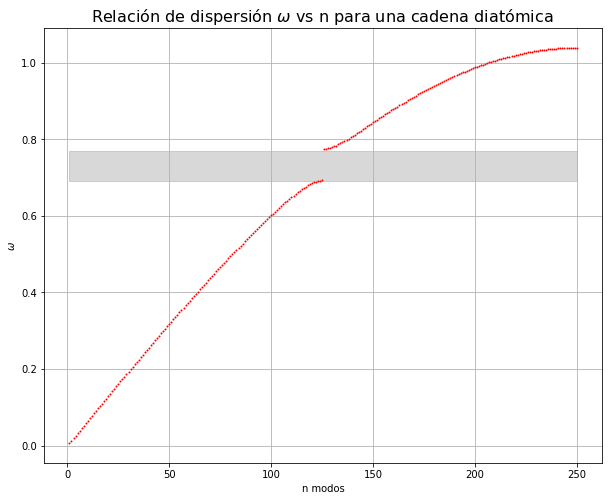

In [ ]:
mb = 2
ma = mb*1.25

n_250 = np.linspace(1, 250, 250)
ecuaciones_masas_dist = ecuaciones_de_newton_matricial(250, ma, mb)
modos_normales_dist = modos_normales(ecuaciones_masas_dist)
frec_masas_dist = modos_normales_dist[0]

y1 = [0.69]*len(n_250)
y2 = [0.77]*len(n_250)

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.title("Relación de dispersión $\omega$ vs n para una cadena diatómica ", fontsize = 16)
plt.ylabel("$\omega$")
plt.xlabel("n modos")
plt.grid()
ax.fill_between(n_250, y1, y2, where=(y1 < y2), color="gray", alpha=0.3)
plt.plot(n_250, frec_masas_dist, "ro", markersize = 1)

Para este caso de masas distintas, ahora en la relación de dispersión hay una *banda prohibida* que se encuentra en el medio de n = 250 modos. Si imprimimos en pantalla las frecuencias para n = 124 y n = 125 vemos el salto abrupto entre estas dos frecuencias. En esta zona donde no existen valores de k (frecuencia espacial) reales, el sistema se comporta reactivamente. Es decir, no hay un movimiento armónico. Esto se explica en detalle en la sección 5.4.2 del [apunte de Ricardo Depine](http://users.df.uba.ar/rdep/F2Apuntes/F2Depinev02.PDF). 


In [ ]:
print("frecuencia 124: "  + str(round(frec_masas_dist[124],2)))
print("frecuencia 125: " + str(round(frec_masas_dist[125],2)))

frecuencia 124: (0.69+0j)
frecuencia 125: (0.77+0j)


Si hacemos que el cociente entre masas aumente:

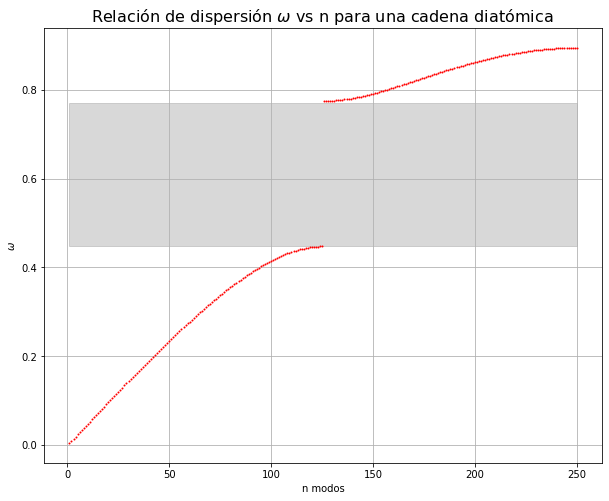

In [ ]:
mb = 2
ma = mb*3

n_250 = np.linspace(1, 250, 250)
ecuaciones_masas_dist = ecuaciones_de_newton_matricial(250, ma, mb)
modos_normales_dist = modos_normales(ecuaciones_masas_dist)
frec_masas_dist = modos_normales_dist[0]

y1b = [0.4472]*len(n_250)
y2b = [0.77]*len(n_250)

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.title("Relación de dispersión $\omega$ vs n para una cadena diatómica ", fontsize = 16)
plt.ylabel("$\omega$")
plt.xlabel("n modos")
ax.fill_between(n_250, y1b, y2b, where=(y1 < y2), color="gray", alpha=0.3)
plt.grid()
plt.plot(n_250, frec_masas_dist, "ro", markersize = 1)

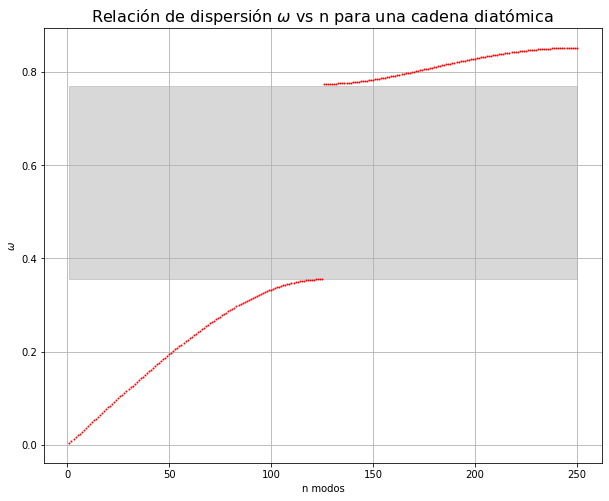

In [ ]:
mb = 2
ma = mb*4.75

n_250 = np.linspace(1, 250, 250)
ecuaciones_masas_dist = ecuaciones_de_newton_matricial(250, ma, mb)
modos_normales_dist = modos_normales(ecuaciones_masas_dist)
frec_masas_dist = modos_normales_dist[0]

y1c = [0.3554]*len(n_250)
y2c = [0.77]*len(n_250)

fig, ax = plt.subplots()
fig.set_size_inches(10,8)

plt.title("Relación de dispersión $\omega$ vs n para una cadena diatómica ", fontsize = 16)
plt.ylabel("$\omega$")
plt.xlabel("n modos")
ax.fill_between(n_250, y1c, y2c, where=(y1 < y2), color="gray", alpha=0.3)
plt.grid()
plt.plot(n_250, frec_masas_dist, "ro", markersize = 1)

Vemos que cuando más masivas sean las masas a respecto de las masas b, más amplia se vuelve la *zona prohibida*. Sin embargo, sigue ocurriendo en n = 125.
 

# Coordenadas desacopladas

Tenemos N = 10 masas y la relación ma = mb.

Sabemos que las coordenadas desde el equilibrio y las coordenadas normales se relacionan por medio de la siguiente expresión:
$\psi = D \phi$. 

Donde $\psi$ es la coordenada del equilibrio, $\phi$ la coordenada normal y $D$ la matriz de autovectores del sistema. 

Luego, para despejar $\phi$ multiplicamos por $D^{-1}$ del lado izquierdo de la ecuación: $D^{-1}\psi = \phi $.



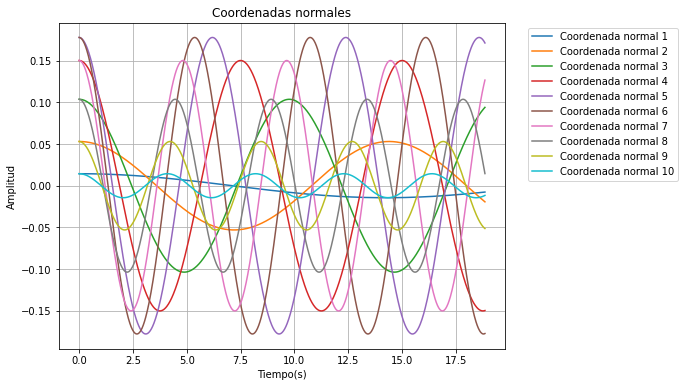

In [ ]:
#@title
autovectores_inversa = np.linalg.inv(modo_autovec_matricial)

plt.figure(figsize=(8,6))
plt.title("Coordenadas normales")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid()

for i in range(len(autovectores_inversa)):
  for j in range(len(autovectores_inversa)):
    phi_normal = autovectores_inversa[i][j]*ecuaciones[j+1][i][0]
  plt.plot(t, phi_normal, label = "Coordenada normal " + str(i+1))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Efectivamente, se desacopló el sistema y a cada coordenada le corresponde un modo en particular. Por ejemplo $\phi_1$ se mueve sólo con $\omega_1$, $\phi_2$ se grafica sólo el movimiento con frecuencia $\omega_2$ y así sucesivamente hasta N = 10.
Además, se puede apreciar que la coordenada normal 10, a la que le corresponde la mayor frecuecia es la que tiene el período más chico e inversamente la coordenada normal 1 tiene el mayor período.

# Evolución del sistema dadas ciertas condiciones iniales.

In [ ]:
Ampl_iniciales_2 = [1,1,0,0,0,0,0,0,0,0] #Le damos amplitudes iniciales sólo a las primeras dos masas

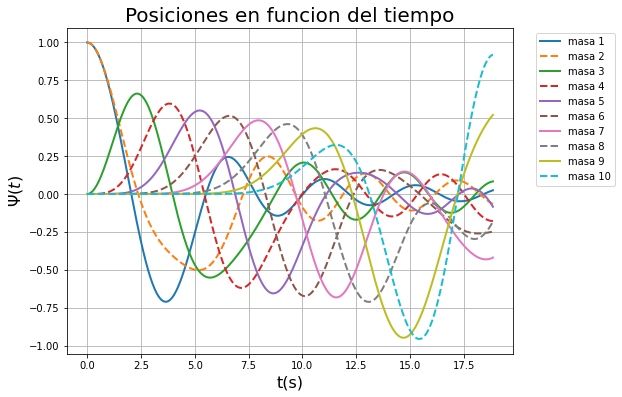

In [ ]:
posiciones = calculadora_de_c_i(10, modo_autovec_matricial, ecuaciones,Ampl_iniciales_2)

"*Una perturbación que se propaga*" 

Se observa que las masas 1 y 2 son las primeras en moverse, lo cuál es lógico porque son las dos a las que estamos alterando con las condiciones iniciales. Luego cada masa le va propagando la perturbación a su vecina. Siendo así la masa 10 la última en alterarse.

Para convencernos de que efectivamente el movimiento se está propagando, decidimos animarlo 

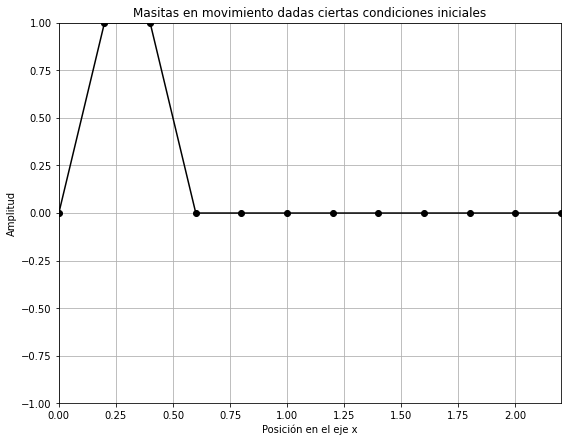

In [ ]:
#@title Código de la animación
psi1 = posiciones[0]
psi2 = posiciones[1]
psi3 = posiciones[2]
psi4 = posiciones[3]
psi5 = posiciones[4]
psi6 = posiciones[5]
psi7 = posiciones[6]
psi8 = posiciones[7]
psi9 = posiciones[8]
psi10 = posiciones[9]

var1=psi1[0]
var2=psi2[0]
var3=psi3[0]
var4=psi4[0]
var5=psi5[0]
var6=psi6[0]
var7=psi7[0]
var8=psi8[0]
var9=psi9[0]
var10=psi10[0]

var0 = [0]*len(var1) #las masas imaginarias fijas en los extremos

fig, ax = plt.subplots(figsize=(9,7));
line, = ax.plot([], [],"ok-");

ax.set_xlim(0,a*(cant_de_masas+1));
ax.set_ylim(-1,1);

plt.xlabel("Posición en el eje x");
plt.ylabel("Amplitud");
plt.title("Masitas en movimiento dadas ciertas condiciones iniciales");
plt.grid();


def animate2(i):
    Y = [var0[i],var1[i], var2[i], var3[i],var4[i],var5[i],var6[i],var7[i],var8[i],var9[i],var10[i],var0[i]]
    X = [0,a,2*a, 3*a,4*a, 5*a, 6*a,7*a, 8*a, 9*a,10*a,11*a]
    line.set_data(X,Y)
    return (line)
  
anim2 = animation.FuncAnimation(fig, animate2, frames=len(t), interval=7);

anim2